In [1]:
import pandas as pd
import numpy as np

In [2]:
sol=pd.read_csv('SMILES-DATA - equal.csv')
sol

,SMILES,RESULT
0,C=CC(=O)NC(=O)NC1(CC2CC3CC(C2)C1)C3,0
1,CC=1C=CC(=CC1)C(=O)C=2OC=CC2NC(=O)C=C,0
2,CN(C)C1=NC(Cl)=C(CNC(=O)C=C)S1,0
3,C=CC(=O)N1CN(CC=2C=CC=CC2)C(=O)C1,0
4,C=CC(=O)NCC(=O)N1CCC=2C=CC=CC2C1,0
...,...,...
451,CS(=O)(=O)NCC1COCCN1C(=O)C=C,1
452,COC=1C=CC=C(C1)C2CN(CCO2)C(=O)C=C,1
453,C[C@@H](NC(=O)C=C)C=1C=NC=CN1,1
454,CC(C)N1C=C(N=N1)C2=CCCN(CC2)C(=O)C=C,1


In [3]:
sol.SMILES

0        C=CC(=O)NC(=O)NC1(CC2CC3CC(C2)C1)C3
1      CC=1C=CC(=CC1)C(=O)C=2OC=CC2NC(=O)C=C
2             CN(C)C1=NC(Cl)=C(CNC(=O)C=C)S1
3          C=CC(=O)N1CN(CC=2C=CC=CC2)C(=O)C1
4           C=CC(=O)NCC(=O)N1CCC=2C=CC=CC2C1
                       ...                  
451             CS(=O)(=O)NCC1COCCN1C(=O)C=C
452        COC=1C=CC=C(C1)C2CN(CCO2)C(=O)C=C
453            C[C@@H](NC(=O)C=C)C=1C=NC=CN1
454     CC(C)N1C=C(N=N1)C2=CCCN(CC2)C(=O)C=C
455            C=CC(=O)N1CCC=2C1=CC=CC2C3CC3
Name: SMILES, Length: 456, dtype: object

In [4]:
sol.SMILES[8]

'C=CC(=O)N1CCN(CC1)S(=O)(=O)CC=2C=CON2'

In [5]:
from rdkit import Chem
#from rdkit.Chem import MACCSkeys
from rdkit.Chem import rdFMCS

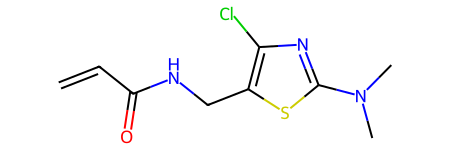

In [6]:
Chem.MolFromSmiles(sol.SMILES[2]) 

In [7]:
for smiles in sol.SMILES[:1]:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # Display or process the molecular structure as needed
        # For example, you can save the structure as an image
        img = Chem.Draw.MolToImage(mol)
        img.show()
        print(img)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x300 at 0x1D70627C220>


In [8]:
mol_list=[]
for element in sol.SMILES:
    mol=Chem.MolFromSmiles(element)
    #print(mol)
    mol_list.append(mol)

In [9]:
len(mol_list)

456

In [10]:
mol_list[:5]

In [11]:
sol.head()

,SMILES,RESULT
0,C=CC(=O)NC(=O)NC1(CC2CC3CC(C2)C1)C3,0
1,CC=1C=CC(=CC1)C(=O)C=2OC=CC2NC(=O)C=C,0
2,CN(C)C1=NC(Cl)=C(CNC(=O)C=C)S1,0
3,C=CC(=O)N1CN(CC=2C=CC=CC2)C(=O)C1,0
4,C=CC(=O)NCC(=O)N1CCC=2C=CC=CC2C1,0


In [12]:
import numpy as np
#from rdkit.Chem import Descriptors

In [13]:
#X=sol.drop(['type','results'],axis='columns')
X=sol.drop(['RESULT'],axis='columns')
Y=sol['RESULT']


In [14]:
X

,SMILES
0,C=CC(=O)NC(=O)NC1(CC2CC3CC(C2)C1)C3
1,CC=1C=CC(=CC1)C(=O)C=2OC=CC2NC(=O)C=C
2,CN(C)C1=NC(Cl)=C(CNC(=O)C=C)S1
3,C=CC(=O)N1CN(CC=2C=CC=CC2)C(=O)C1
4,C=CC(=O)NCC(=O)N1CCC=2C=CC=CC2C1
...,...
451,CS(=O)(=O)NCC1COCCN1C(=O)C=C
452,COC=1C=CC=C(C1)C2CN(CCO2)C(=O)C=C
453,C[C@@H](NC(=O)C=C)C=1C=NC=CN1
454,CC(C)N1C=C(N=N1)C2=CCCN(CC2)C(=O)C=C


In [15]:
Y.value_counts()

0    228
1    228
Name: RESULT, dtype: int64

In [16]:
from rdkit import Chem
from rdkit.Chem import MACCSkeys

#Generate MACCS fingerprint
from rdkit.Chem import MACCSkeys
fp = MACCSkeys.GenMACCSKeys(mol)
fp

In [17]:
# Obtain the fingerprint as a binary string or array

fp_string = fp.ToBitString()
fp_array = np.array(list(fp_string), dtype=int)
fp_string

'00000000000000000000001000000000001000000000000000000000000000100000000000010000000101000000100010011100010000110000011001100000100000010100000010011000011010100111110'

In [18]:
fp_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [19]:
len(fp_string)

167

In [20]:
fp_array.shape

(167,)

In [21]:
# Assuming `sol` is your DataFrame with the 'SMILES' column

# Define a function to convert SMILES strings to fingerprints
def smiles_to_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    fp = MACCSkeys.GenMACCSKeys(mol)
    fingerprint = np.array(list(fp.ToBitString()), dtype=int)
    return fingerprint

# Apply the function to the 'SMILES' column and create a new column for the fingerprints
sol['Fingerprint'] = sol['SMILES'].apply(smiles_to_fingerprint)

# Access the 'SMILES' and 'Fingerprint' columns
X = sol[['Fingerprint']]
X



,Fingerprint
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...
451,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
452,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
453,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
454,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [22]:
fingerprints = sol['Fingerprint'] 
fingerprints_df = pd.DataFrame( fingerprints.tolist())
print(fingerprints_df)
X=fingerprints_df
X

     0    1    2    3    4    5    6    7    8    9    ...  157  158  159  \
0      0    0    0    0    0    0    0    0    0    0  ...    0    1    1   
1      0    0    0    0    0    0    0    0    0    0  ...    0    1    1   
2      0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
3      0    0    0    0    0    0    0    0    0    0  ...    0    1    1   
4      0    0    0    0    0    0    0    0    0    0  ...    0    1    1   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
451    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
452    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
453    0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
454    0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
455    0    0    0    0    0    0    0    0    0    0  ...    0    1    0   

     160  161  162  163  164  165  166  
0      0    1    0    1    1    1 

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,1,1,0
452,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
453,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
454,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,1,1,0


In [23]:
Y=sol[['RESULT']]
Y

,RESULT
0,0
1,0
2,0
3,0
4,0
...,...
451,1
452,1
453,1
454,1


In [24]:
Y.value_counts()

RESULT
0         228
1         228
dtype: int64

In [25]:
# oversampling  SMOTE

#from imblearn.over_sampling import SMOTE

#smote = SMOTE(sampling_strategy='minority')
#X_sm, Y_sm = smote.fit_resample(X,Y)

#Y_sm.value_counts()

In [26]:
# import tensorflow as tf
# from tensorflow import keras

# class FocalLoss(keras.losses.Loss):
#     def __init__(self, alpha=0.25, gamma=2.0):
#         super(FocalLoss, self).__init__()
#         self.alpha = alpha
#         self.gamma = gamma

#     def call(self, y_true, y_pred):
#         ce_loss = keras.losses.categorical_crossentropy(y_true, y_pred)
#         pt = tf.exp(-ce_loss)
#         focal_loss = self.alpha * tf.pow(1 - pt, self.gamma) * ce_loss
#         return focal_loss

In [27]:
#Y_sm.to_csv('data-1111.csv', index=False)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)


In [30]:
X_train.shape

(364, 167)

In [31]:
X_test.shape

(92, 167)

In [32]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
import numpy as np
import joblib

# Assume X_sm and Y_sm are your features and labels respectively

# Create an SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 10-fold cross-validation
accuracy_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='accuracy')

# Print the accuracy for each fold
print("Accuracy scores for each fold:")
for i, score in enumerate(accuracy_scores, 1):
    print(f"Fold {i}: {score:.3f}")

# Print the average accuracy across all folds
print(f"\nAverage accuracy: {np.mean(accuracy_scores):.3f}")

# If satisfied with the average accuracy, you might choose to retrain the model on the entire dataset
svm_model.fit(X, Y)

# Save the retrained model
joblib.dump(svm_model, 'svm_model_final.joblib')


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Accuracy scores for each fold:
Fold 1: 0.717
Fold 2: 0.652
Fold 3: 0.696
Fold 4: 0.804
Fold 5: 0.804
Fold 6: 0.761
Fold 7: 0.711
Fold 8: 0.733
Fold 9: 0.822
Fold 10: 0.756

Average accuracy: 0.746


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

['svm_model_final.joblib']

In [31]:

#########################################  SVM   MODEL#################################################

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


# Split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size=0.2, random_state=42)
# X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)


# Create an SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can adjust the parameters as needed

# Train the SVM model
svm_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
class_report = classification_report(Y_test, y_pred)

# Save the trained model
joblib.dump(svm_model, 'svm_model.joblib')

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


# Convert y_pred and Y_test to NumPy arrays
y_pred = np.array(y_pred)
Y_test = np.array(Y_test)
# Find the indices of False Positives (FP)
fp_indices = np.where((y_pred == 1) & (Y_test == 0))[0]

# Find the indices of False Negatives (FN)
fn_indices = np.where((y_pred == 0) & (Y_test == 1))[0]

# Print the indices of False Positives and False Negatives
print("False Positives (FP):", fp_indices)
print("False Negatives (FN):", fn_indices)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8546875
Confusion Matrix:
[[293  50]
 [ 43 254]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       343
           1       0.84      0.86      0.85       297

    accuracy                           0.85       640
   macro avg       0.85      0.85      0.85       640
weighted avg       0.86      0.85      0.85       640

False Positives (FP): [  3   3   3 ... 638 638 638]
False Negatives (FN): [  0   0   0 ... 639 639 639]


In [33]:
################################################### Compare ML algorithm#################################################

# Defines and builds the lazyclassifier


import lazypredict
from lazypredict.Supervised import LazyRegressor

clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:10<00:00,  4.10it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 249
[LightGBM] [Info] Number of data points in the train set: 364, number of used features: 83
[LightGBM] [Info] Start training from score 0.508242
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.63it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 249
[LightGBM] [Info] Number of data points in the train set: 364, number of used features: 83
[LightGBM] [Info] Start training from score 0.508242
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [34]:

# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,1.00,1.00,0.00,0.02
ExtraTreeRegressor,1.00,1.00,0.00,0.03
ExtraTreesRegressor,1.00,1.00,0.00,0.47
GaussianProcessRegressor,1.00,1.00,0.00,0.09
XGBRegressor,1.00,1.00,0.01,0.15
MLPRegressor,0.97,0.99,0.06,0.24
RandomForestRegressor,0.82,0.90,0.16,0.44
BaggingRegressor,0.74,0.86,0.19,0.05
NuSVR,0.71,0.84,0.20,0.05


In [35]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.46,0.60,0.31,1.17
SVR,0.46,0.60,0.32,0.48
NuSVR,0.46,0.60,0.32,0.58
LGBMRegressor,0.44,0.59,0.32,0.13
HistGradientBoostingRegressor,0.44,0.59,0.32,4.32
XGBRegressor,0.39,0.55,0.33,0.12
BaggingRegressor,0.39,0.55,0.34,0.15
GradientBoostingRegressor,0.24,0.44,0.37,0.50
BayesianRidge,0.18,0.39,0.39,0.06


[(0.0, 1.0)]

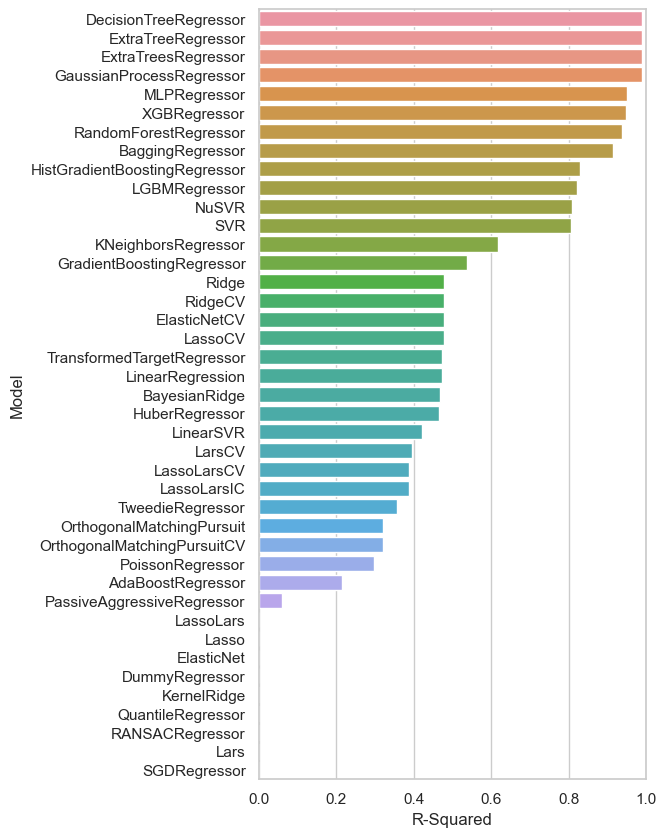

In [36]:
############################# Data visualization of model performance#########################################


# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))
     

[(0.0, 10.0)]

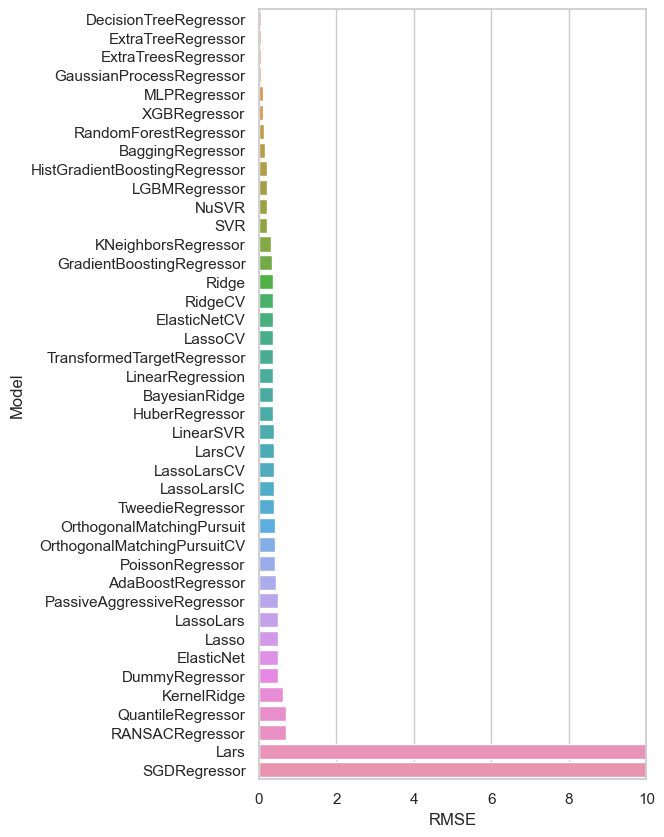

In [37]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))
     

[(0.0, 10.0)]

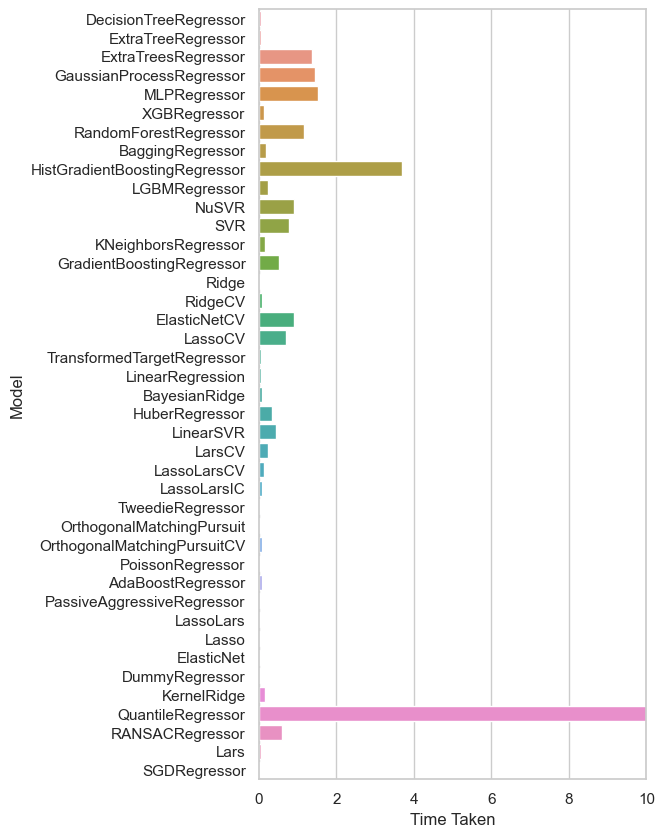

In [38]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

In [39]:
import autokeras as ak
import numpy as np

# Assuming X_train, X_test, Y_train, Y_test are already defined and preprocessed

# Define the model
reg = ak.StructuredDataRegressor(max_trials=10, overwrite=True)

# Fit the model
# Note: AutoKeras' fit method automatically splits the data for validation,
# so you only need to provide the training data here.
reg.fit(X_train, Y_train, epochs=10)

# Evaluate the model
loss, mse = reg.evaluate(X_test, Y_test)
print(f"Test loss: {loss}, MSE: {mse}")

# Predict with the best model.
predictions_test = reg.predict(X_test)

# predictions_test will be in numpy array format. If you need it in the same format as lazypredict's output,
# you might need to manually adjust or process the predictions array.


ModuleNotFoundError: No module named 'autokeras'

In [40]:
import joblib
joblib.dump(svm_model, 'modelFNNFINAL_joblib')

['modelFNNFINAL_joblib']

In [48]:
# from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# import numpy as np

# # Reshape the target variable to a 1-dimensional array
# Y = np.ravel(Y)

# # Split the data into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# # Create an instance of the Naive Bayes classifier
# nb_classifier = GaussianNB()

# # Train the classifier using the training data
# nb_classifier.fit(X_train, Y_train)

# # Predict the labels for the test data
# Y_pred = nb_classifier.predict(X_test)

# # Evaluate the accuracy of the classifier
# accuracy = accuracy_score(Y_test,Y_pred)
# print("Accuracy:", accuracy)

# Y_pd = (Y_pred > 0.5).astype(int)
# print("Classification Report: \n", classification_report(Y_test, Y_pd))

In [49]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
3187,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
1889,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,1,0
1253,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
1147,0,0,0,0,0,0,0,0,1,0,...,1,1,1,0,1,1,1,1,1,0
2801,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
1143,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
2202,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
1846,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


In [75]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
506,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,1,1,0
2513,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
354,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
1080,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,1,0
2389,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,1,1,0
1952,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
29,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
2682,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0


In [76]:
X_val

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
2644,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,1,1,0
1931,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
2767,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,1,0
1288,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
92,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
1229,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,1,0
2760,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
3029,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,1,0


In [77]:
X_train.shape

(1928, 167)

In [78]:
X_val.shape

(643, 167)

In [79]:
X_test.shape

(643, 167)

In [ ]:
# Define GAN parameters
latent_dim = 100
smiles_dim = 166
n_epochs = 10000
batch_size = 128

# Define the generator network
def build_generator(latent_dim, output_dim):
    input_layer = Input(shape=(latent_dim,))
    x = Dense(128, activation='relu')(input_layer)
    x = Dense(256, activation='relu')(x)
    output_layer = Dense(output_dim, activation='sigmoid')(x)
    generator = Model(input_layer, output_layer)
    return generator

# Define the discriminator network
def build_discriminator(input_dim):
    input_layer = Input(shape=(input_dim,))
    x = Dense(256, activation='relu')(input_layer)
    x = Dense(128, activation='relu')(x)
    output_layer = Dense(1, activation='sigmoid')(x)
    discriminator = Model(input_layer, output_layer)
    return discriminator

# Define the GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = Input(shape=(latent_dim,))
    gan_output = discriminator(generator(gan_input))
    gan = Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

# Define functions for generating random noise and training data
def generate_noise(n_samples, latent_dim):
    return np.random.normal(0, 1, (n_samples, latent_dim))

def generate_real_samples(data, n_samples):
    idx = np.random.randint(0, data.shape[0], n_samples)
    return data[idx]

# Build and compile the generator and discriminator
generator = build_generator(latent_dim, smiles_dim)
discriminator = build_discriminator(smiles_dim)
gan = build_gan(generator, discriminator)

# Training loop
for epoch in range(n_epochs):
    # Generate random noise and fake SMILES samples
    noise = generate_noise(batch_size, latent_dim)
    fake_smiles = generator.predict(noise)

    # Generate real SMILES samples (replace 'data' with your actual dataset)
    real_smiles = generate_real_samples(X_train_sm, batch_size)

    # Train the discriminator
    discriminator_loss_real = discriminator.train_on_batch(real_smiles, np.ones((batch_size, 1)))
    discriminator_loss_fake = discriminator.train_on_batch(fake_smiles, np.zeros((batch_size, 1)))
    discriminator_loss = 0.5 * np.add(discriminator_loss_real, discriminator_loss_fake)

    # Train the generator
    noise = generate_noise(batch_size, latent_dim)
    generator_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print the losses
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}")

# Generate new molecular SMILES samples
num_samples = 10
noise = generate_noise(num_samples, latent_dim)
new_smiles = generator.predict(noise)
print("Generated SMILES:")
for smile in new_smiles:
    print(smile)

In [ ]:
# ############# generative model###################### 
from tensorflow.keras.models import load_model
generative_model = svm_model

latent_dim=167

# Define a function to generate new molecular SMILES
def generate_molecular_smiles(generative_model, num_samples=100):
    generated_smiles = []
    for _ in range(num_samples):
        # Generate a random noise vector
        random_noise = np.random.normal(0, 1, (1, latent_dim))
        # Generate SMILES using the generative model
        generated_smile = generative_model.predict(random_noise)[0]
        generated_smiles.append(generated_smile)
    return generated_smiles

# Generate new molecular SMILES
num_samples = 10  # Adjust the number of samples as needed
new_smiles = generate_molecular_smiles(generative_model, num_samples)

# Print the generated SMILES
for i, smile in enumerate(new_smiles):
    print(f'Sample {i+1}: {smile}')

In [ ]:
import numpy as np
from diffusion_models import DiffusionModel

# Load or train your diffusion model
diffusion_model = DiffusionModel()
diffusion_model.train(dataset)


# Define a function to generate molecular SMILES
def generate_molecular_smiles(diffusion_model, num_samples):
    generated_smiles = []
    for _ in range(num_samples):
        # Initialize the initial token sequence
        token_sequence = np.zeros((1, max_length), dtype=np.int32)
        # Generate SMILES using the diffusion model
        for t in range(max_length):
            # Sample from the diffusion model
            next_token_logits = diffusion_model.sample(token_sequence)
            # Sample the next token
            next_token = np.argmax(next_token_logits[0, t])
            # Append the next token to the token sequence
            token_sequence[0, t] = next_token
            # Stop generation if the end token is reached
            if next_token == end_token:
                break
        # Convert the token sequence to a SMILES string
        smile = tokens_to_smiles(token_sequence)
        generated_smiles.append(smile)
    return generated_smiles

# Generate new molecular SMILES
num_samples = 10  # Adjust the number of samples as needed
new_smiles = generate_molecular_smiles(diffusion_model, num_samples)

# Print the generated SMILES
for i, smile in enumerate(new_smiles):
    print(f"Sample {i + 1}: {smile}")
